In [1]:
# block images (One should not do that before splitting up the data to avoid correlation. Thus, lots of boilerplate code here)

import os.path

import skimage.io

import joblib
import warnings

import numpy as np

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
data_set_dir = "/home/jr0th/github/segmentation/data/BBBC022_1000/"

# derived directories
in_dir_images_training = data_set_dir + "training/x_big/"
in_dir_labels_training = data_set_dir + "training/y_big/"

in_dir_images_validation = data_set_dir + "validation/x_big/"
in_dir_labels_validation = data_set_dir + "validation/y_big/"

in_dir_images_test = data_set_dir + "test/x_big/"
in_dir_labels_test = data_set_dir + "test/y_big/"

out_dir_images_training = data_set_dir + "training/x/all/"
out_dir_labels_training = data_set_dir + "training/y/all/"

out_dir_images_validation = data_set_dir + "validation/x/all/"
out_dir_labels_validation = data_set_dir + "validation/y/all/"

out_dir_images_test = data_set_dir + "test/x/all/"
out_dir_labels_test = data_set_dir + "test/y/all/"

in_dirs_images = [in_dir_images_training, in_dir_images_validation, in_dir_images_test]
in_dirs_labels = [in_dir_labels_training, in_dir_labels_validation, in_dir_labels_test]

out_dirs_images = [out_dir_images_training, out_dir_images_validation, out_dir_images_test]
out_dirs_labels = [out_dir_labels_training, out_dir_labels_validation, out_dir_labels_test]

In [3]:
def process_image(index, images, out_dir_image):
    
    image = images[index]

    path = images.files[index]
    filename = os.path.basename(path)
    
    split = os.path.splitext(filename)

    blocks = skimage.util.view_as_windows(image, (256, 256), 256)
    
    for i in range(blocks.shape[0]):
        for j in range(blocks.shape[1]):
            patchname = split[0] + '_' + str(i) + '_' + str(j) + split[1]
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                skimage.io.imsave(out_dir_image + patchname, blocks[i,j])

In [4]:
def process_label(index, labels, out_dir_label):
    
    label = labels[index]

    path = labels.files[index]
    filename = os.path.basename(path)
    
    split = os.path.splitext(filename)

    blocks = skimage.util.view_as_windows(label, (256, 256, 3), 256)
    blocks = blocks.squeeze()
    
    for i in range(blocks.shape[0]):
        for j in range(blocks.shape[1]):
            patchname = split[0] + '_' + str(i) + '_' + str(j) + split[1]
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                skimage.io.imsave(out_dir_label + patchname, blocks[i,j])

In [5]:
def process_image_dir(in_dir_image, out_dir_image):
    images = skimage.io.imread_collection(in_dir_image + '*.png')
    joblib.Parallel(n_jobs = 100)(joblib.delayed(process_image)(i, images, out_dir_image) for i in range(len(images)))  
    
def process_label_dir(in_dir_label, out_dir_label):
    labels = skimage.io.imread_collection(in_dir_label + '*.png')
    joblib.Parallel(n_jobs = 100)(joblib.delayed(process_label)(i, labels, out_dir_label) for i in range(len(labels)))  

In [6]:
for i in range(len(in_dirs_images)):
    print(str(i))
    process_image_dir(in_dirs_images[i], out_dirs_images[i])

0
1
2


In [7]:
for i in range(len(in_dirs_labels)):
    print(str(i))
    process_label_dir(in_dirs_labels[i], out_dirs_labels[i])

0
1
2


uint8
uint8


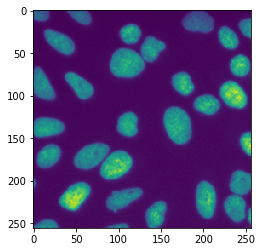

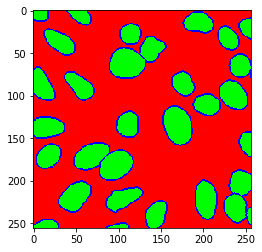

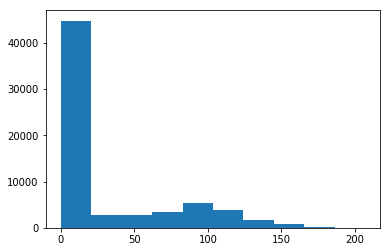

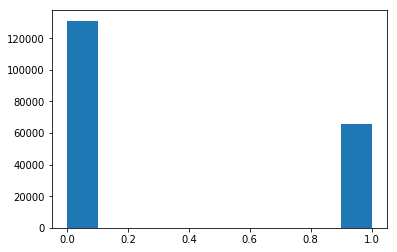

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

img_y = skimage.io.imread('/home/jr0th/github/segmentation/data/BBBC022_100/validation/y/all/BBBC022_v1_images_20586w1_IXMtest_E09_s8_w1FF2EA9D2-CCAA-4E5C-B548-013DE72C4BC3_0_0.png')
img_x = skimage.io.imread('/home/jr0th/github/segmentation/data/BBBC022_100/validation/x/all/BBBC022_v1_images_20586w1_IXMtest_E09_s8_w1FF2EA9D2-CCAA-4E5C-B548-013DE72C4BC3_0_0.png')

print(img_x.dtype)
print(img_y.dtype)
img_y_8bit = skimage.img_as_uint(img_y)

plt.figure()
plt.imshow(img_x)
plt.show()
plt.figure()
plt.imshow(img_y_8bit)
plt.show()

plt.figure()
plt.hist(img_x.flatten())
plt.show()
plt.figure()
plt.hist(img_y.flatten())
plt.show()
                        